# Fluxes
Download data from
https://github.com/BlackHolePerturbationToolkit/CircularOrbitSelfForceData

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from few.utils.utility import CubicSpline

def Omega_phi_eqpro(r, a):
        return(1./(np.sqrt(r*r*r) + a))

def EdotPN(r,a):
    y = np.power(Omega_phi_eqpro(r,a),2./3.)
    res = 6.4*np.power(y,5) - 23.752380952380953*np.power(y,6) + 1.6*(50.26548245743669 - 11.*a)*np.power(y,6.5) + (-31.54215167548501 + 13.2*np.power(a,2))*np.power(y,7) + 0.009523809523809525*(-25732.785425553997 - 2646.*a - 504.*np.power(a,3))*np.power(y,7.5) + \
   (-649.6614141423464 + 260.32427983539094*a + 163.36281798666926*np.power(a,2) - 32.13333333333333*np.power(a,3))*np.power(y,8.5) + np.power(y,8)*(740.6829867239124 - 217.8170906488923*a + 7.758730158730159*np.power(a,2) - 52.17523809523809*np.log(y)) #+\
       #np.power(y,9)*(-748.828100625135 - 515.5802343491364*a + 69.31499118165785*np.power(a,2) + 5.2*np.power(a,4) + 3.2*np.sqrt(1. - 1.*np.power(a,2)) + 41.6*np.power(a,2)*np.sqrt(1. - 1.*np.power(a,2)) + 19.2*np.power(a,4)*np.sqrt(1. - 1.*np.power(a,2)) + 12.8*(a + 3.*np.power(a,3)) + 168.77786848072563*np.log(y))

    return res

def isco_pro(a):
      Z1 = 1. + (np.power(1. + a, 1./3.) + np.power(1. - a, 1./3.)) * np.power((1. + a)*(1. - a), 1./3.)
      Z2 = np.sqrt(3.*a*a + Z1*Z1)

      return(3. + Z2 - np.sqrt((3. - Z1)*(3. + Z1 + 2.*Z2)))


def isco_kerr(a):
    isc = 3 + np.sqrt(3*np.power(a,2) + np.power(1 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)),2)) - \
   np.sqrt((2 - np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)))*\
     (4 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)) + \
       2*np.sqrt(3*np.power(a,2) + np.power(1 + np.power(1 - np.power(a,2),0.3333333333333333)*(np.power(1 - a,0.3333333333333333) + np.power(1 + a,0.3333333333333333)),2))))
    return isc


In [2]:
a_array = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 0.95, 0.99]

flux_data = np.zeros((10000, 3, len(a_array)))
reint_flux_data = np.zeros((10000, len(a_array)))
PN_Edot = np.zeros((10000, len(a_array)))

spline_arr =[]

base_u = np.flip(np.log( np.loadtxt('/Users/lorenzosperi/Documents/GitHub/CircularOrbitSelfForceData/Kerr/Fluxes/Flux_Edot_a'+str(np.round(a_array[0],decimals=2)) +'.dat')[:,0] - isco_pro(a_array[0]) +3.9))
base_r = np.exp(base_u) + isco_pro(a_array[0]) -3.9

for i in range(len(a_array)):
    flux_data[:,:,i] = np.loadtxt('/Users/lorenzosperi/Documents/GitHub/CircularOrbitSelfForceData/Kerr/Fluxes/Flux_Edot_a'+str(np.round(a_array[i],decimals=2)) +'.dat')
    xx = np.flip(np.log(flux_data[:,0,i] - isco_pro(a_array[i]) +3.9))
    yy = np.flip(flux_data[:,2,i]+flux_data[:,1,i])
    spl = CubicSpline(xx, yy)
    PN_Edot[:,i] = EdotPN(base_r, a_array[i])
    reint_flux_data[:,i] = spl(base_u)# - PN_Edot[:,i]

In [3]:
reint_flux_data.shape

(10000, 10)

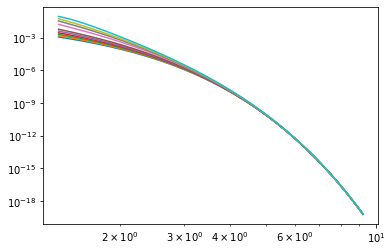

In [4]:

for i in range(len(a_array)):
    plt.loglog(base_u, reint_flux_data[:,i])

In [5]:
base_u

array([1.36097655, 1.36126248, 1.36154841, ..., 9.19386719, 9.20199869,
       9.21016336])

## Total Flux

In [7]:
with open('few/files/FluxesEdotResc_u_a.dat', 'w') as f:
    for j in range(len(a_array)):
        for i in range(len(base_u)):
            #print(str(fluxes[i,j])+'\t' +  str(u[i,j])+'\t' + str(a_array[j]))
            #if i%3==0:
            print(i)
            f.write( str(reint_flux_data[i,j])+'\t' +  str(base_u[i] )+'\t' + str(a_array[j]) )
            f.write('\n')
    f.close()

9
7782
7785
7788
7791
7794
7797
7800
7803
7806
7809
7812
7815
7818
7821
7824
7827
7830
7833
7836
7839
7842
7845
7848
7851
7854
7857
7860
7863
7866
7869
7872
7875
7878
7881
7884
7887
7890
7893
7896
7899
7902
7905
7908
7911
7914
7917
7920
7923
7926
7929
7932
7935
7938
7941
7944
7947
7950
7953
7956
7959
7962
7965
7968
7971
7974
7977
7980
7983
7986
7989
7992
7995
7998
8001
8004
8007
8010
8013
8016
8019
8022
8025
8028
8031
8034
8037
8040
8043
8046
8049
8052
8055
8058
8061
8064
8067
8070
8073
8076
8079
8082
8085
8088
8091
8094
8097
8100
8103
8106
8109
8112
8115
8118
8121
8124
8127
8130
8133
8136
8139
8142
8145
8148
8151
8154
8157
8160
8163
8166
8169
8172
8175
8178
8181
8184
8187
8190
8193
8196
8199
8202
8205
8208
8211
8214
8217
8220
8223
8226
8229
8232
8235
8238
8241
8244
8247
8250
8253
8256
8259
8262
8265
8268
8271
8274
8277
8280
8283
8286
8289
8292
8295
8298
8301
8304
8307
8310
8313
8316
8319
8322
8325
8328
8331
8334
8337
8340
8343
8346
8349
8352
8355
8358
8361
8364
8367
8370
8373
8376
837